<a href="https://colab.research.google.com/github/soominjung/3minutes-deep-learning/blob/master/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [60]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("./mnist/data", one_hot=True)

Extracting ./mnist/data/train-images-idx3-ubyte.gz
Extracting ./mnist/data/train-labels-idx1-ubyte.gz
Extracting ./mnist/data/t10k-images-idx3-ubyte.gz
Extracting ./mnist/data/t10k-labels-idx1-ubyte.gz



**one-hot encoding:**
데이터가 가질 수 있는 값들을 일렬로 나열한 배열을 만들고,
그 중 표현하려는 값을 뜻하는 인덱스의 원소만 1로 표기하고 나머지 원소는 모두 0으로 채우는 표기법

In [0]:
X = tf.placeholder(tf.float32, [None, 784])
Y = tf.placeholder(tf.float32, [None, 10])

**placeholder:** 항상 feed 되는 텐서로서, Session.run() 등의 함수 사용 시, feed_dict 옵션으로 feed 해줘야 함

**X:** 입력할 데이터인 MNIST의 손글씨 이미지가 28X28픽셀이므로 [None, 784]로 정의됨

**Y:** 출력되는 레이블이 총 10개이므로 [None, 10]으로 정의됨
*****
placeholder를 만들 때 첫번째 차원은 학습시킬 데이터의 개수를 의미하는데, 이를 None으로 두면 텐서플로우가 알아서 계산한다.

In [0]:
keep_prob = tf.placeholder(tf.float32)

W1 = tf.Variable(tf.random_normal([784, 256], stddev=0.01))
b1 = tf.Variable(tf.zeros([256]))
L1 = tf.nn.relu(tf.add(tf.matmul(X, W1), b1))
L1 = tf.nn.dropout(L1, keep_prob)

W2 = tf.Variable(tf.random_normal([256, 256], stddev=0.01))
b2 = tf.Variable(tf.zeros([256]))
L2 = tf.nn.relu(tf.add(tf.matmul(L1, W2), b2))
L2 = tf.nn.dropout(L2, keep_prob)

W3 = tf.Variable(tf.random_normal([256, 10], stddev=0.01))
b3 = tf.Variable(tf.zeros([10]))
model = tf.add(tf.matmul(L2, W3), b3)

은닉층은 2개이며 은닉층의 뉴런 개수는 각각 256개인 신경망을 정의함

**dropout:** 과적합을 방지하기 위해 신경망의 뉴런 중 일부만 사용하도록 함, 예측 시에는 신경망 전체를 사용하기 때문에 이를 조절하기 위해 keep_prob이라는 플레이스홀더를 정의해 사용한다. 


In [0]:
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=model, labels=Y))
optimizer = tf.train.AdamOptimizer(0.001).minimize(cost)

**cost:** softmax cross entropy를 계산해 각 이미지에 대한 손실값을 구함 (labes은 실제 데이터에서의 결과값, logits은 신경망 모델을 뜻함)

In [0]:
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

batch_size = 100
total_batch = int(mnist.train.num_examples / batch_size)

미니배치 크기 = 100

미니배치 갯수 = 학습 데이터 총 개수/미니배치 크기

In [65]:
for epoch in range(30):
  total_cost = 0
  
  for i in range(total_batch):
    batch_xs, batch_ys = mnist.train.next_batch(batch_size)

    _, cost_val = sess.run([optimizer, cost],
                          feed_dict={X: batch_xs,
                                     Y: batch_ys,
                                     keep_prob: 0.8})
    total_cost += cost_val
    
  print('Epoch:', '%04d' % (epoch + 1),
          'Avg. cost = ', '{:.3f}'.format(total_cost / total_batch))

print('최적화 완료!')

Epoch: 0001 Avg. cost =  0.426
Epoch: 0002 Avg. cost =  0.165
Epoch: 0003 Avg. cost =  0.115
Epoch: 0004 Avg. cost =  0.090
Epoch: 0005 Avg. cost =  0.072
Epoch: 0006 Avg. cost =  0.062
Epoch: 0007 Avg. cost =  0.053
Epoch: 0008 Avg. cost =  0.048
Epoch: 0009 Avg. cost =  0.041
Epoch: 0010 Avg. cost =  0.036
Epoch: 0011 Avg. cost =  0.034
Epoch: 0012 Avg. cost =  0.031
Epoch: 0013 Avg. cost =  0.029
Epoch: 0014 Avg. cost =  0.026
Epoch: 0015 Avg. cost =  0.026
Epoch: 0016 Avg. cost =  0.025
Epoch: 0017 Avg. cost =  0.022
Epoch: 0018 Avg. cost =  0.023
Epoch: 0019 Avg. cost =  0.022
Epoch: 0020 Avg. cost =  0.021
Epoch: 0021 Avg. cost =  0.019
Epoch: 0022 Avg. cost =  0.019
Epoch: 0023 Avg. cost =  0.018
Epoch: 0024 Avg. cost =  0.017
Epoch: 0025 Avg. cost =  0.018
Epoch: 0026 Avg. cost =  0.018
Epoch: 0027 Avg. cost =  0.016
Epoch: 0028 Avg. cost =  0.015
Epoch: 0029 Avg. cost =  0.015
Epoch: 0030 Avg. cost =  0.016
최적화 완료!


MNIST 데이터 전체를 학습하는 일을 총 15번 반복할 것이다. (epoch: 학습 데이터 전체를 한 바퀴 도는 것)

**batch_xs, batch_ys:** 미니배치 크기 만큼 데이터를 가져와 저장함

sess.run을 이용해 최적화 시키고 손실값을 가져와서 저장함

In [0]:
is_correct = tf.equal(tf.argmax(model, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

예측 결과인 model의 값과 실제 레이블인 Y의 값을 비교함

**argmax:** 텐서에 저장된 값 중 가장 큰 값의 인덱스를 뽑아내는 함수 (1은 차원 지정)

In [67]:
print('정확도:', sess.run(accuracy,
                       feed_dict={X: mnist.test.images,
                                  Y: mnist.test.labels,
                                  keep_prob: 1.0}))

정확도: 0.9824


In [0]:
labels = sess.run(model,
                 feed_dict={X: mnist.test.images,
                           keep_prob: 1.0})

테스트 데이터를 이용해 예측 모델을 실행한 후 결과값을 labels에 저장함

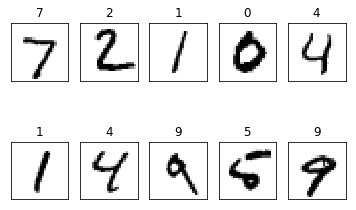

In [94]:
fig = plt.figure()
for i in range(10):
  subplot = fig.add_subplot(2, 5, i+1)
  subplot.set_xticks([])
  subplot.set_yticks([])
  subplot.set_title('%d' % np.argmax(labels[i]))
  subplot.imshow(mnist.test.images[i].reshape((28, 28)),
                cmap=plt.cm.gray_r)
plt.show()

**set_xticks, set_yticks:** 
**imshow:** 1차원 배열을 28X28 형식의 2차원 배열로 변형해 이미지 형태로 출력